Kích thước tập huấn luyện: (9652, 7)
Kích thước tập kiểm tra: (2413, 7)

--- Bắt đầu huấn luyện mô hình Random Forest ---
--- Mô hình đã huấn luyện thành công! ---

Accuracy (Độ chính xác): 0.5226

--- Báo cáo Phân loại chi tiết ---
              precision    recall  f1-score   support

    GIẢM (0)       0.53      0.84      0.65      1279
    TĂNG (1)       0.48      0.16      0.24      1134

    accuracy                           0.52      2413
   macro avg       0.50      0.50      0.45      2413
weighted avg       0.51      0.52      0.46      2413


--- Hiển thị các biểu đồ đánh giá ---


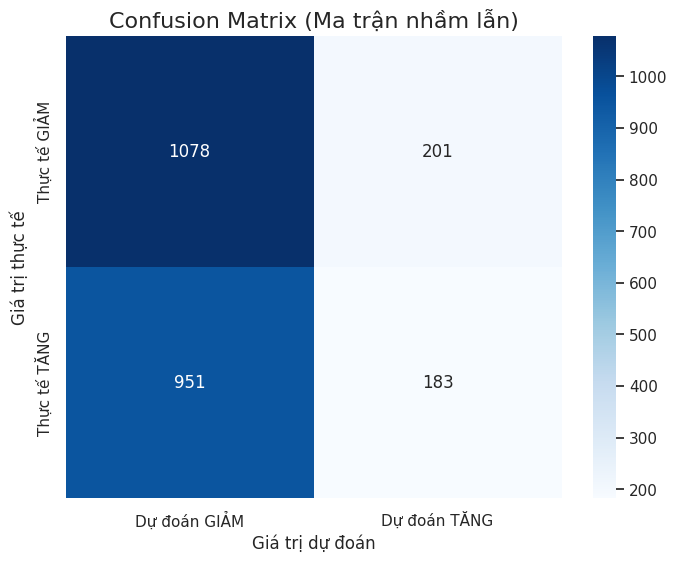

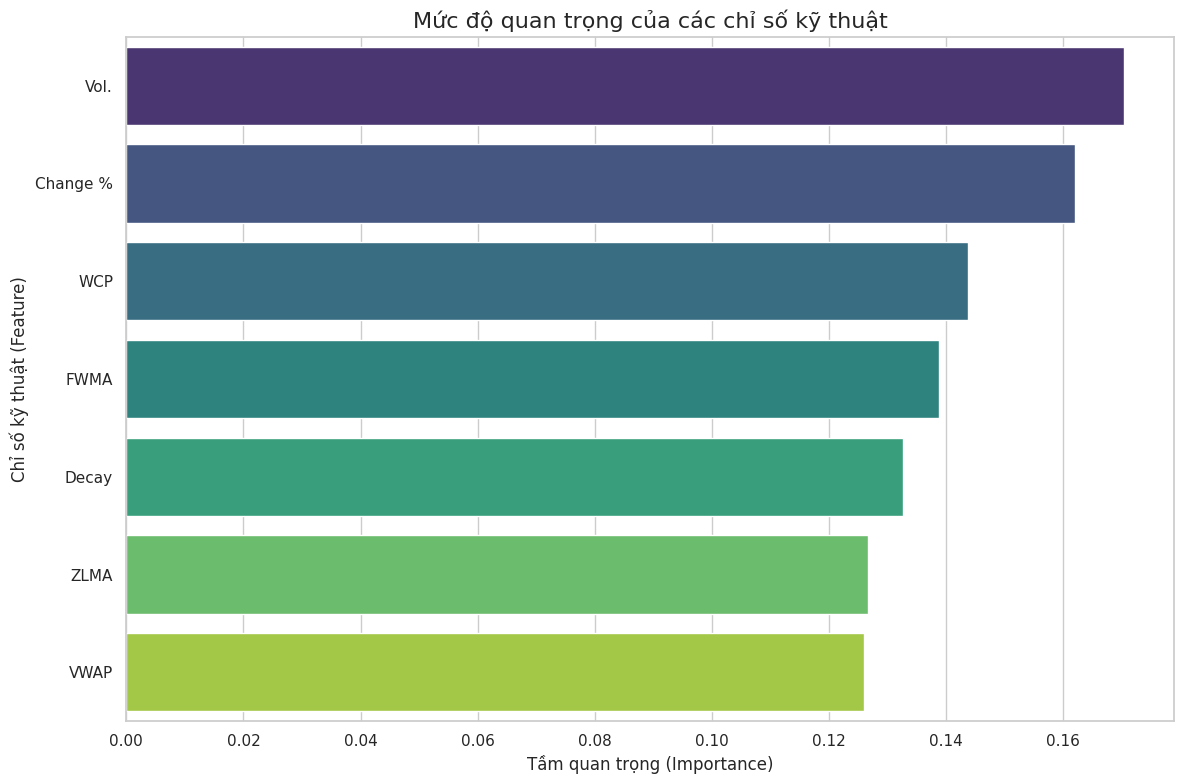

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Bỏ qua các cảnh báo không cần thiết
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

try:
    # 1. ĐỌC VÀ CHUẨN BỊ DỮ LIỆU
    df = pd.read_csv('stock_data_with_indicators.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Ticker', 'Date'])

    # Tạo cột mục tiêu (Target)
    df['Next_Price'] = df.groupby('Ticker')['Price'].shift(-1)
    df['Target'] = (df['Next_Price'] > df['Price']).astype(int)

    # Loại bỏ các hàng có giá trị NaN
    df_ml = df.dropna()

    # Chọn các đặc trưng (features) và mục tiêu (target)
    features = ['Vol.', 'Change %', 'WCP', 'VWAP', 'ZLMA', 'FWMA', 'Decay']
    X = df_ml[features]
    y = df_ml['Target']

    # 2. PHÂN CHIA DỮ LIỆU
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Kích thước tập huấn luyện: {X_train.shape}")
    print(f"Kích thước tập kiểm tra: {X_test.shape}")

    # 3. HUẤN LUYỆN MÔ HÌNH RANDOM FOREST
    print("\n--- Bắt đầu huấn luyện mô hình Random Forest ---")
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    print("--- Mô hình đã huấn luyện thành công! ---")

    # 4. ĐÁNH GIÁ MÔ HÌNH
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy (Độ chính xác): {accuracy:.4f}")
    print("\n--- Báo cáo Phân loại chi tiết ---")
    print(classification_report(y_test, y_pred, target_names=['GIẢM (0)', 'TĂNG (1)']))

    # 5. TRỰC QUAN HÓA KẾT QUẢ
    print("\n--- Hiển thị các biểu đồ đánh giá ---")
    
    # Ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Dự đoán GIẢM', 'Dự đoán TĂNG'],
                yticklabels=['Thực tế GIẢM', 'Thực tế TĂNG'])
    plt.title('Confusion Matrix (Ma trận nhầm lẫn)', fontsize=16)
    plt.ylabel('Giá trị thực tế', fontsize=12)
    plt.xlabel('Giá trị dự đoán', fontsize=12)
    plt.show() # Lệnh hiển thị biểu đồ
    
    # Mức độ quan trọng của các chỉ số
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Mức độ quan trọng của các chỉ số kỹ thuật', fontsize=16)
    plt.xlabel('Tầm quan trọng (Importance)', fontsize=12)
    plt.ylabel('Chỉ số kỹ thuật (Feature)', fontsize=12)
    plt.tight_layout()
    plt.show() # Lệnh hiển thị biểu đồ

except FileNotFoundError:
    print("\nLỗi: Không tìm thấy tệp 'stock_data_with_indicators.csv'.")
except Exception as e:
    print(f"\nĐã xảy ra một lỗi không mong muốn: {e}")

In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 38.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 35.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


--- DỮ LIỆU VỚI CÁC CHỈ SỐ GỐC ĐÃ SẴN SÀNG (Features: 7) ---

--- Bắt đầu huấn luyện mô hình XGBoost ---
--- Mô hình XGBoost đã huấn luyện thành công! ---

--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH XGBOOST (CHỈ SỐ CŨ) ---
Accuracy của XGBoost: 0.5126

Báo cáo Phân loại chi tiết:
              precision    recall  f1-score   support

    GIẢM (0)       0.53      0.70      0.60      1279
    TĂNG (1)       0.47      0.30      0.37      1134

    accuracy                           0.51      2413
   macro avg       0.50      0.50      0.49      2413
weighted avg       0.50      0.51      0.49      2413


--- Hiển thị các biểu đồ đánh giá ---


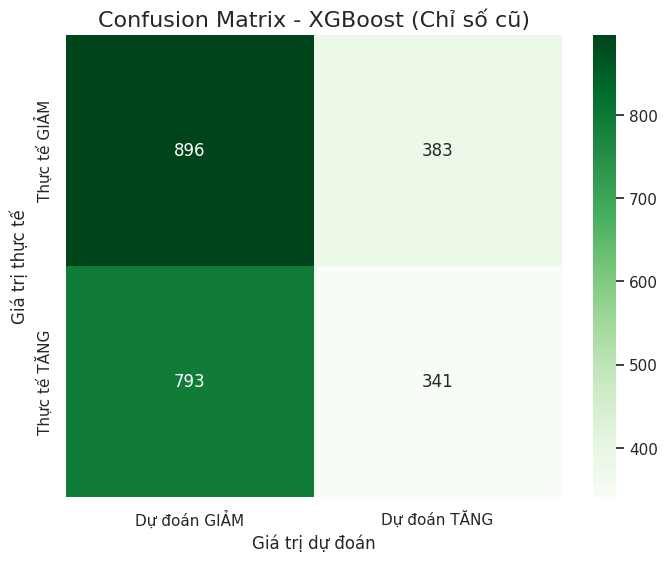

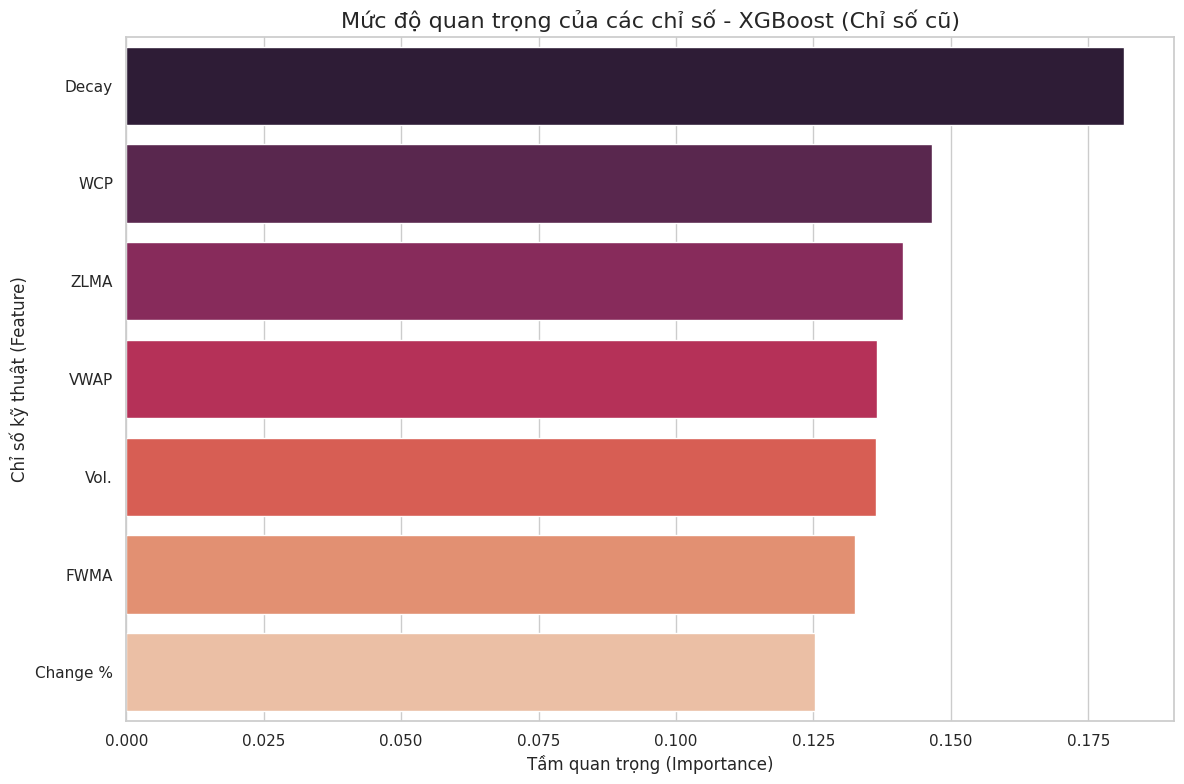

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy.lib.stride_tricks import as_strided
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

try:
    # 1. ĐỌC VÀ TÍNH TOÁN CÁC CHỈ SỐ KỸ THUẬT GỐC
    df = pd.read_csv('cleaned_stock_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Ticker', 'Date'])

    def calculate_original_indicators(data, period=20, decay_factor=0.95):
        # WCP, VWAP, ZLMA
        data['WCP'] = (data['High'] + data['Low'] + 2 * data['Price']) / 4
        vwap_num = (data['WCP'] * data['Vol.']).rolling(window=period).sum()
        vwap_den = data['Vol.'].rolling(window=period).sum()
        data['VWAP'] = vwap_num / vwap_den
        ema1 = data['Price'].ewm(span=period, adjust=False).mean()
        source = 2 * data['Price'] - ema1
        data['ZLMA'] = source.ewm(span=period, adjust=False).mean()

        # FWMA
        def fwma_calc(prices: np.ndarray) -> float:
            n = len(prices)
            i = np.arange(1, n + 1)
            weights = np.cos((i - 1) * np.pi / n)
            return np.dot(prices, weights) / np.sum(weights)
        data['FWMA'] = data['Price'].rolling(window=period).apply(fwma_calc, raw=True)

        # Decay
        if len(data) >= period:
            price_vals = data['Price'].values
            vol_vals = data['Vol.'].values
            s_price = price_vals.strides[0]
            price_windows = as_strided(price_vals, shape=(len(price_vals) - period + 1, period), strides=(s_price, s_price))
            s_vol = vol_vals.strides[0]
            vol_windows = as_strided(vol_vals, shape=(len(vol_vals) - period + 1, period), strides=(s_vol, s_vol))
            decay_weights = decay_factor ** np.arange(period - 1, -1, -1)
            numerator = np.sum(price_windows * vol_windows * decay_weights, axis=1)
            denominator = np.sum(vol_windows * decay_weights, axis=1)
            decay_result = np.divide(numerator, denominator, out=np.full_like(numerator, np.nan), where=denominator!=0)
            padded_decay = np.concatenate([np.full(period - 1, np.nan), decay_result])
            data['Decay'] = padded_decay
        else:
            data['Decay'] = np.nan
        
        return data

    # Áp dụng hàm tính toán cho từng mã cổ phiếu
    df_indicators = df.groupby('Ticker', group_keys=False).apply(calculate_original_indicators)

    # 2. CHUẨN BỊ DỮ LIỆU CHO MACHINE LEARNING
    df_indicators['Next_Price'] = df_indicators.groupby('Ticker')['Price'].shift(-1)
    df_indicators['Target'] = (df_indicators['Next_Price'] > df_indicators['Price']).astype(int)
    df_ml = df_indicators.dropna()

    # Chỉ sử dụng các features cũ
    features = ['Vol.', 'Change %', 'WCP', 'VWAP', 'ZLMA', 'FWMA', 'Decay']
    X = df_ml[features]
    y = df_ml['Target']

    # Phân chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"--- DỮ LIỆU VỚI CÁC CHỈ SỐ GỐC ĐÃ SẴN SÀNG (Features: {len(features)}) ---")

    # 3. HUẤN LUYỆN MÔ HÌNH XGBOOST
    print("\n--- Bắt đầu huấn luyện mô hình XGBoost ---")
    
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    
    model.fit(X_train, y_train)
    print("--- Mô hình XGBoost đã huấn luyện thành công! ---")

    # 4. ĐÁNH GIÁ MÔ HÌNH
    y_pred = model.predict(X_test)
    
    print("\n--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH XGBOOST (CHỈ SỐ CŨ) ---")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy của XGBoost: {accuracy:.4f}")
    print("\nBáo cáo Phân loại chi tiết:")
    print(classification_report(y_test, y_pred, target_names=['GIẢM (0)', 'TĂNG (1)']))

    # 5. TRỰC QUAN HÓA KẾT QUẢ
    print("\n--- Hiển thị các biểu đồ đánh giá ---")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Dự đoán GIẢM', 'Dự đoán TĂNG'],
                yticklabels=['Thực tế GIẢM', 'Thực tế TĂNG'])
    plt.title('Confusion Matrix - XGBoost (Chỉ số cũ)', fontsize=16)
    plt.ylabel('Giá trị thực tế', fontsize=12)
    plt.xlabel('Giá trị dự đoán', fontsize=12)
    plt.show()
    
    # Feature Importance
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
    plt.title('Mức độ quan trọng của các chỉ số - XGBoost (Chỉ số cũ)', fontsize=16)
    plt.xlabel('Tầm quan trọng (Importance)', fontsize=12)
    plt.ylabel('Chỉ số kỹ thuật (Feature)', fontsize=12)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\nLỗi: Không tìm thấy tệp 'cleaned_stock_data.csv'.")
except ImportError:
    print("\nLỗi: Thư viện XGBoost chưa được cài đặt.")
    print("Vui lòng chạy lệnh: pip install xgboost")
except Exception as e:
    print(f"\nĐã xảy ra một lỗi không mong muốn: {e}")

In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

try:
    # --- CÁC HÀM TÍNH TOÁN CHỈ SỐ (sao chép từ trước) ---
    def calculate_initial_indicators(data, period=20):
        data['WCP'] = (data['High'] + data['Low'] + 2 * data['Price']) / 4
        vwap_num = (data['WCP'] * data['Vol.']).rolling(window=period).sum()
        vwap_den = data['Vol.'].rolling(window=period).sum()
        data['VWAP'] = vwap_num / vwap_den
        ema1 = data['Price'].ewm(span=period, adjust=False).mean()
        source = 2 * data['Price'] - ema1
        data['ZLMA'] = source.ewm(span=period, adjust=False).mean()
        return data

    def calculate_advanced_indicators(data, rsi_period=14, macd_fast=12, macd_slow=26, macd_signal=9, bband_period=20):
        delta = data['Price'].diff()
        gain = (delta.where(delta > 0, 0)).ewm(alpha=1/rsi_period, adjust=False).mean()
        loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/rsi_period, adjust=False).mean()
        rs = gain / loss
        data['RSI'] = 100 - (100 / (1 + rs))
        ema_fast = data['Price'].ewm(span=macd_fast, adjust=False).mean()
        ema_slow = data['Price'].ewm(span=macd_slow, adjust=False).mean()
        data['MACD'] = ema_fast - ema_slow
        data['MACD_Signal'] = data['MACD'].ewm(span=macd_signal, adjust=False).mean()
        data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']
        sma = data['Price'].rolling(window=bband_period).mean()
        std = data['Price'].rolling(window=bband_period).std()
        data['BB_Upper'] = sma + (std * 2)
        data['BB_Lower'] = sma - (std * 2)
        data['BB_Width'] = (data['BB_Upper'] - data['BB_Lower']) / sma
        return data

    # 1. TẢI VÀ CHUẨN BỊ TOÀN BỘ DỮ LIỆU LỊCH SỬ
    df = pd.read_csv('cleaned_stock_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Ticker', 'Date'])

    # Tính toán tất cả các chỉ số
    df_indicators = df.groupby('Ticker', group_keys=False).apply(calculate_initial_indicators)
    df_full_indicators = df_indicators.groupby('Ticker', group_keys=False).apply(calculate_advanced_indicators)

    # Tạo cột Target để huấn luyện
    df_full_indicators['Next_Price'] = df_full_indicators.groupby('Ticker')['Price'].shift(-1)
    df_full_indicators['Target'] = (df_full_indicators['Next_Price'] > df_full_indicators['Price']).astype(int)
    df_ml = df_full_indicators.dropna()

    features = [
        'Vol.', 'Change %', 'WCP', 'VWAP', 'ZLMA',
        'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_Width'
    ]
    X_train = df_ml[features]
    y_train = df_ml['Target']

    # 2. HUẤN LUYỆN MÔ HÌNH TRÊN TOÀN BỘ DỮ LIỆU
    print("--- Bắt đầu huấn luyện mô hình XGBoost trên toàn bộ dữ liệu lịch sử... ---")
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)
    print("--- Mô hình đã sẵn sàng để dự báo! ---")


    # 3. HÀM DỰ BÁO CHO NGÀY MAI
    def predict_tomorrow(ticker_symbol):
        # Lấy dữ liệu của cổ phiếu cần dự báo
        stock_data = df_full_indicators[df_full_indicators['Ticker'] == ticker_symbol].copy()
        
        # Lấy dòng dữ liệu cuối cùng (ngày hôm nay)
        latest_data = stock_data.tail(1)
        
        # Kiểm tra xem có đủ dữ liệu để dự báo không
        if latest_data.empty or latest_data[features].isnull().values.any():
            print(f"\nKhông đủ dữ liệu cho {ticker_symbol} để đưa ra dự báo.")
            return

        # Lấy các giá trị chỉ số của ngày hôm nay
        features_to_predict = latest_data[features]
        
        # Thực hiện dự báo
        prediction = model.predict(features_to_predict)
        prediction_proba = model.predict_proba(features_to_predict)

        latest_date = latest_data['Date'].dt.date.iloc[0]
        
        print(f"\n--- DỰ BÁO CHO CỔ PHIẾU {ticker_symbol} ---")
        print(f"Dữ liệu cuối cùng vào ngày: {latest_date}")
        
        if prediction[0] == 1:
            print(f"Dự báo xu hướng ngày mai: TĂNG")
            print(f"Độ chắc chắn (Confidence): {prediction_proba[0][1]:.2%}")
        else:
            print(f"Dự báo xu hướng ngày mai: GIẢM")
            print(f"Độ chắc chắn (Confidence): {prediction_proba[0][0]:.2%}")

    # 4. THỰC HIỆN DỰ BÁO
    predict_tomorrow('FPT')
    predict_tomorrow('VCB')

except FileNotFoundError:
    print("\nLỗi: Không tìm thấy tệp 'cleaned_stock_data.csv'.")
except Exception as e:
    print(f"\nĐã xảy ra một lỗi không mong muốn: {e}")

--- Bắt đầu huấn luyện mô hình XGBoost trên toàn bộ dữ liệu lịch sử... ---
--- Mô hình đã sẵn sàng để dự báo! ---

--- DỰ BÁO CHO CỔ PHIẾU FPT ---
Dữ liệu cuối cùng vào ngày: 2025-10-01
Dự báo xu hướng ngày mai: GIẢM
Độ chắc chắn (Confidence): 57.13%

--- DỰ BÁO CHO CỔ PHIẾU VCB ---
Dữ liệu cuối cùng vào ngày: 2025-10-01
Dự báo xu hướng ngày mai: GIẢM
Độ chắc chắn (Confidence): 52.82%
